In [2]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [3]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [4]:
#data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_transect2_gps.Dat")
data = ert.load(dir+"processing/arenson/arenson_updated.dat")
data

06/09/24 - 09:28:27 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 57 data: 925, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

06/09/24 - 09:28:29 - pyGIMLi - INFO - Cache C:\Users\mealiy001\Projects\tuk_island\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (4.3s x 85): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\162931402017577431
06/09/24 - 09:28:29 - pyGIMLi - INFO - Cache C:\Users\mealiy001\Projects\tuk_island\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 85): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\652702588648680815


925 [16.82973002902715,...,16.777984803820342]

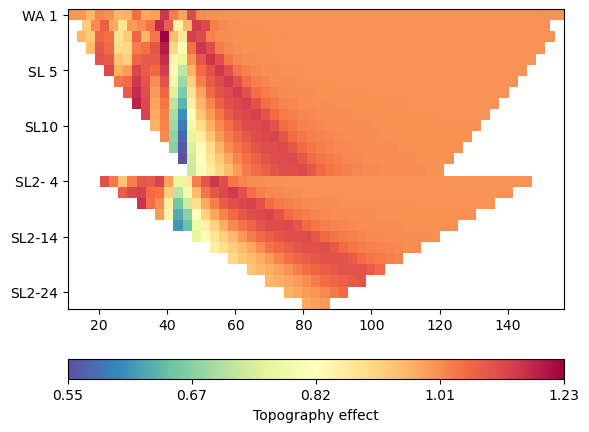

In [5]:
#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x22d28db2310>)

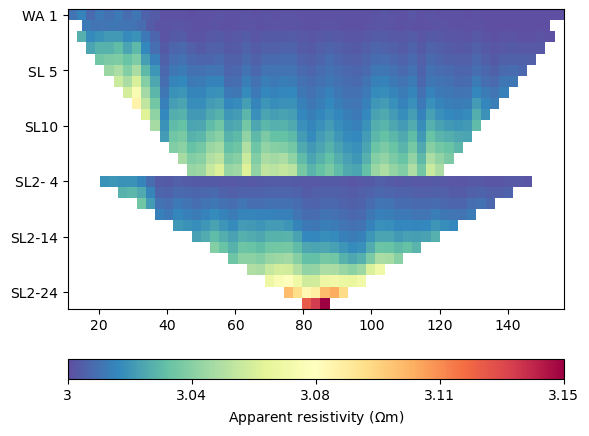

In [6]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x22d28dbef10>)

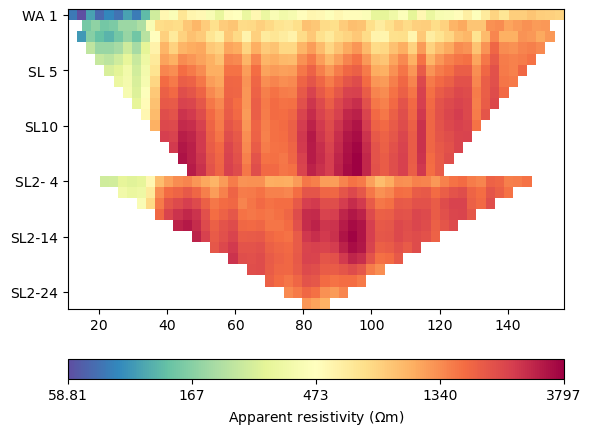

In [7]:
ert.showData(data)

06/09/24 - 09:41:27 - pyGIMLi - INFO - Use median(data values)=1628.574
06/09/24 - 09:41:27 - pyGIMLi - INFO - Created startmodel from forward operator: 924, min/max=1628.574000/1628.574000
06/09/24 - 09:41:27 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000022D28CA9120>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000022D28657AB0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000022D288D9260>
min/max (data): 58.81/3797
min/max (error): 3%/3.15%
min/max (start model): 1629/1629
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  551.44
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   89.54 (dPhi = 83.46%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   14.73 (dPhi = 80.53%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.53 (dPhi = 42.69%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.05 (dPhi = 35.11%) lam: 20.0
------------

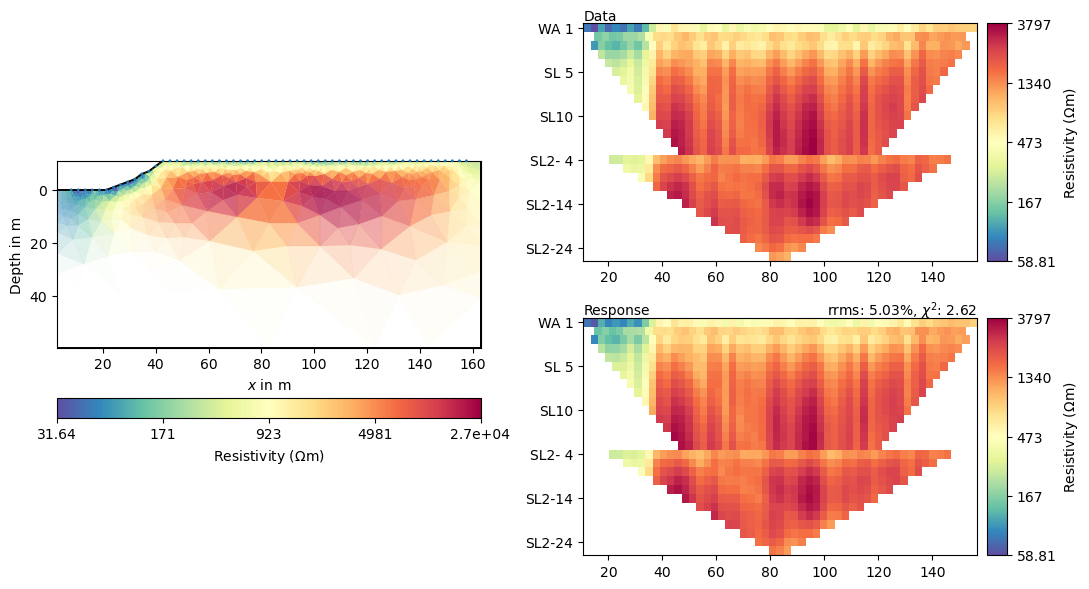

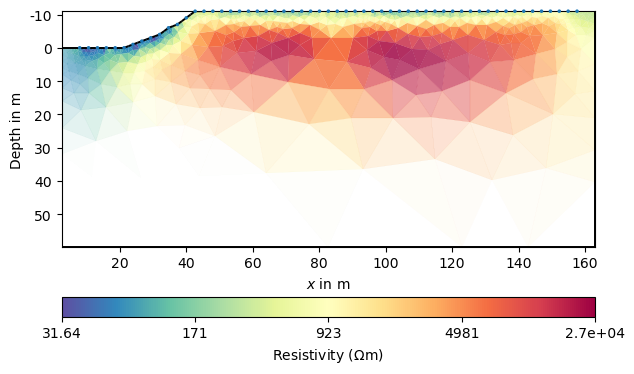

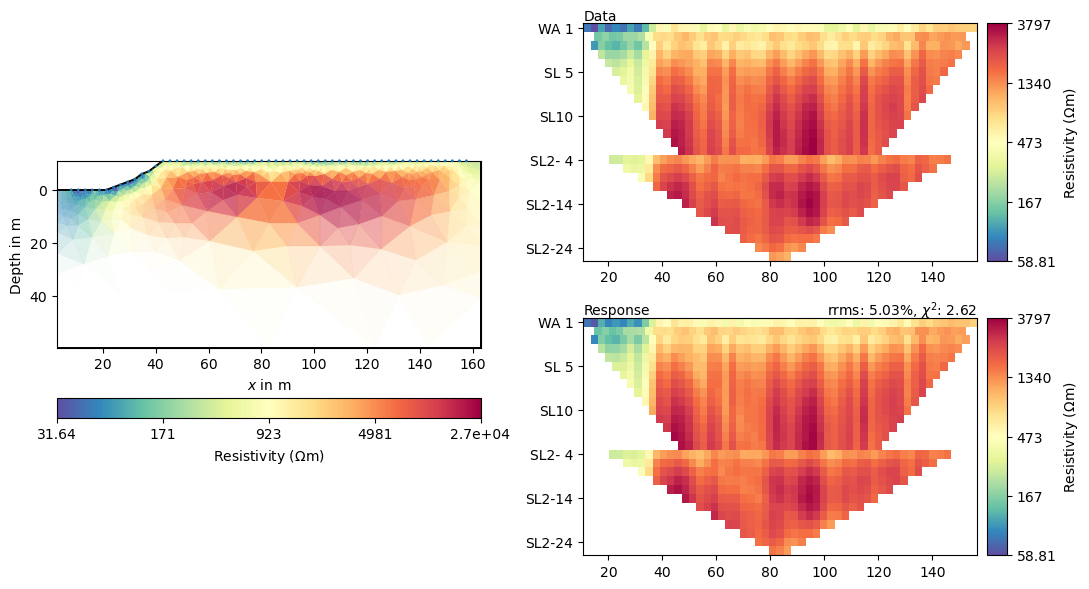

In [12]:
mgr.invert(data, verbose=True, lam=20)

mgr.showResult()
mgr.showResultAndFit()

06/09/24 - 09:35:10 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/arenson_updated\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/arenson_updated\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/arenson_updated\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

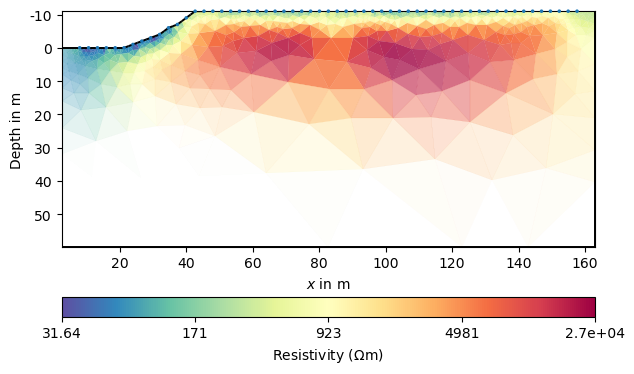

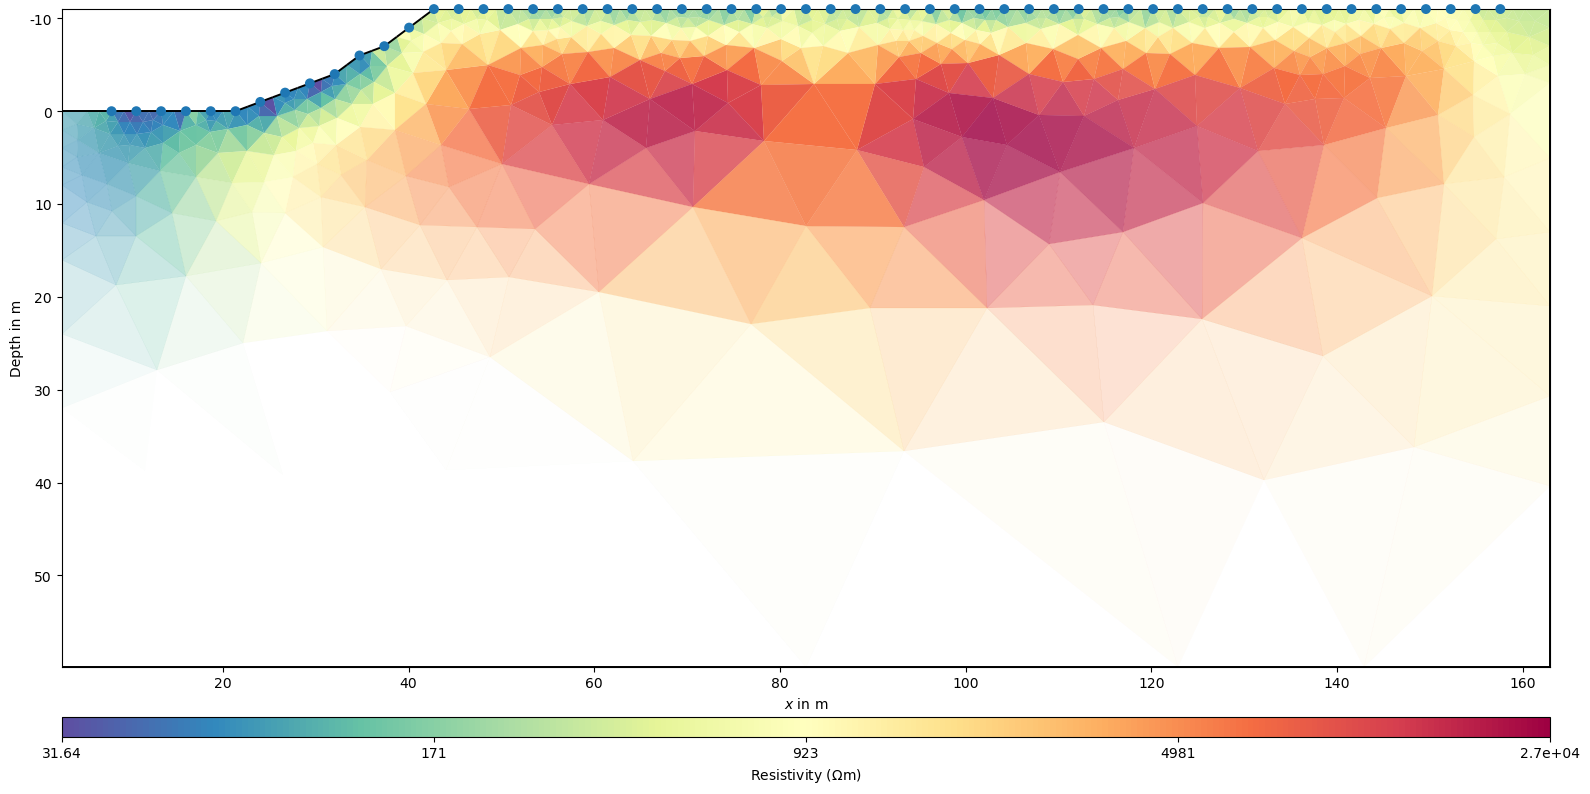

In [11]:
mgr.showResult()
mgr.saveResult(dir+ 'pygimli/all_inversions/arenson_updated')